In [2]:
from keras.applications.vgg16 import VGG16

In [3]:
from keras_preprocessing import image

In [4]:
import numpy as np

In [5]:
import os

In [8]:
from keras.applications.imagenet_utils import preprocess_input # to convert the input to appropriate dimentional formats

In [10]:
from keras.applications.imagenet_utils import decode_predictions # this will decode the predictions into human read classes

In [12]:
path = os.getcwd()

In [14]:
data_path = path+'/training'
data_dir = os.listdir(data_path)

In [15]:
data_dir # this is the data folder

['vegetarian', 'places', 'non_vegetarian']

In [13]:
model = VGG16()

2022-10-08 18:20:20.187297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


553467096/553467096 [==============================] - 7s 0us/step


In [ ]:
img_path = 'vegetarian'

#
_____

In [11]:
model = ResNet50()

2022-10-08 15:19:13.571147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [13]:
path = os.getcwd()

In [14]:
data_path = path+'/training'
data_dir = os.listdir(data_path)

In [15]:
data_dir # this is the data folder

['vegetarian', 'places', 'non_vegetarian']

In [41]:
vegetarian_images = os.listdir(data_path+'/vegetarian')
len(vegetarian_images)

428

In [42]:
non_vegetarian_images = os.listdir(data_path+'/non_vegetarian')
len(non_vegetarian_images)

2181

In [43]:
places_images = os.listdir(data_path+'/places')
len(places_images)

2753

In [17]:
img_data_list = []
labels = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path +'/'+ data + '/' + img
        try:
            img = image.load_img(img_path, target_size= (224,224))
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
        except:
            continue

Loading images of vegetarian
Loading images of places
Loading images of non_vegetarian


In [28]:
img_data_list[0]

array([[[-28.939003 ,  -9.778999 ,  49.32     ],
        [-20.939003 ,  -7.7789993,  40.32     ],
        [ 52.060997 ,  40.221    ,  51.32     ],
        ...,
        [-44.939003 , -15.778999 ,  39.32     ],
        [-44.939003 , -11.778999 ,  43.32     ],
        [-38.939003 ,  -7.7789993,  56.32     ]],

       [[-33.939003 , -13.778999 ,  48.32     ],
        [-15.939003 ,  -3.7789993,  35.32     ],
        [ 82.061    ,  67.221    ,  65.32     ],
        ...,
        [-34.939003 ,  -3.7789993,  54.32     ],
        [-35.939003 ,  -4.7789993,  52.32     ],
        [-34.939003 ,  -1.7789993,  54.32     ]],

       [[-26.939003 , -11.778999 ,  47.32     ],
        [ -1.939003 ,   4.2210007,  34.32     ],
        [ 98.061    ,  84.221    ,  80.32     ],
        ...,
        [-28.939003 ,   3.2210007,  59.32     ],
        [-25.939003 ,   5.2210007,  58.32     ],
        [-14.939003 ,  11.221001 ,  69.32     ]],

       ...,

       [[-30.939003 , -26.779    ,   7.3199997],
        [-3

In [19]:
img_data = np.array(img_data_list)

In [20]:
img_data.shape

(5360, 224, 224, 3)

In [21]:
np.save('train_data.npy', img_data)

In [22]:
np.save('train_labels.npy', labels)

In [23]:
img_data = np.load('train_data.npy')
labels = np.load('train_labels.npy')

In [26]:
len(img_data)

5360

In [134]:
len(labels)

5360

In [27]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', ..., 'non_vegetarian',
       'non_vegetarian', 'non_vegetarian'], dtype='<U14')

In [136]:
num_class = 3
num_of_samples = img_data.shape[0]

In [137]:
num_of_samples

5360

In [138]:
from tensorflow.keras.utils import to_categorical

In [139]:
names = ['vegetarian', 'places', 'non_vegetarian']

In [140]:
from tensorflow.keras import utils

In [141]:
num_labels = []

In [142]:
for each in labels:
    if each == 'vegetarian':
        num_labels.append(0)
    elif each == 'non_vegetarian':
        num_labels.append(1)
    else:
        num_labels.append(2)

In [143]:
num_labels= np.array(num_labels)

In [144]:
num_labels

array([0, 0, 0, ..., 1, 1, 1])

In [145]:
num_labels[:2]

array([0, 0])

In [146]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', ..., 'non_vegetarian',
       'non_vegetarian', 'non_vegetarian'], dtype='<U14')

In [147]:
x = img_data

In [148]:
y = utils.to_categorical(num_labels, num_classes=3)

In [149]:
y[:2]

array([[1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Train Test Split:

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [152]:
X_train.shape

(4288, 224, 224, 3)

In [153]:
X_test.shape

(1072, 224, 224, 3)

# Modeling :

In [43]:
from keras.layers import Input, Flatten, Dense

In [44]:
from keras.models import Model

In [45]:
from tensorflow.keras.optimizers import Adam

In [46]:
image_input = Input(shape=(224, 224,3))

In [47]:
model1 = ResNet50(input_tensor= image_input, include_top=True, weights= 'imagenet')
model1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [48]:
last_layer = model1.get_layer('avg_pool').output

In [49]:
last_layer

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [50]:
x = Flatten(name='Flatten')(last_layer)

In [51]:
out = Dense(3, activation='softmax', name = 'output_layer')(x)

In [52]:
custom_resnet_model = Model(image_input, out)

In [53]:
custom_resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [54]:
for layer in custom_resnet_model.layers[:-1]:
    layer.trainable=False
    
custom_resnet_model.layers[-1].trainable

True

In [55]:
custom_resnet_model.compile(loss='categorical_crossentropy',
                            optimizer= Adam(learning_rate=0.0001),
                            metrics=['acc'])

# Fitting the Model:

In [56]:
X_train.shape

(4288, 224, 224, 3)

In [57]:
history = custom_resnet_model.fit(X_train, y_train, 
                        batch_size=32,
                        epochs=10,
                        verbose=1,
                        validation_data=(X_test, y_test))

Epoch 1/10
134/134 [==============================] - 363s 3s/step - loss: 0.7507 - acc: 0.6882 - val_loss: 0.5420 - val_acc: 0.8078
Epoch 2/10
134/134 [==============================] - 351s 3s/step - loss: 0.4739 - acc: 0.8295 - val_loss: 0.4824 - val_acc: 0.8368
Epoch 3/10
134/134 [==============================] - 333s 2s/step - loss: 0.4296 - acc: 0.8456 - val_loss: 0.4612 - val_acc: 0.8358
Epoch 4/10
134/134 [==============================] - 328s 2s/step - loss: 0.4069 - acc: 0.8561 - val_loss: 0.4590 - val_acc: 0.8396
Epoch 5/10
134/134 [==============================] - 330s 2s/step - loss: 0.3913 - acc: 0.8603 - val_loss: 0.4432 - val_acc: 0.8414
Epoch 6/10
134/134 [==============================] - 329s 2s/step - loss: 0.3771 - acc: 0.8638 - val_loss: 0.4447 - val_acc: 0.8442
Epoch 7/10
134/134 [==============================] - 342s 3s/step - loss: 0.3663 - acc: 0.8696 - val_loss: 0.4403 - val_acc: 0.8386
Epoch 8/10
134/134 [==============================] - 353s 3s/step - 

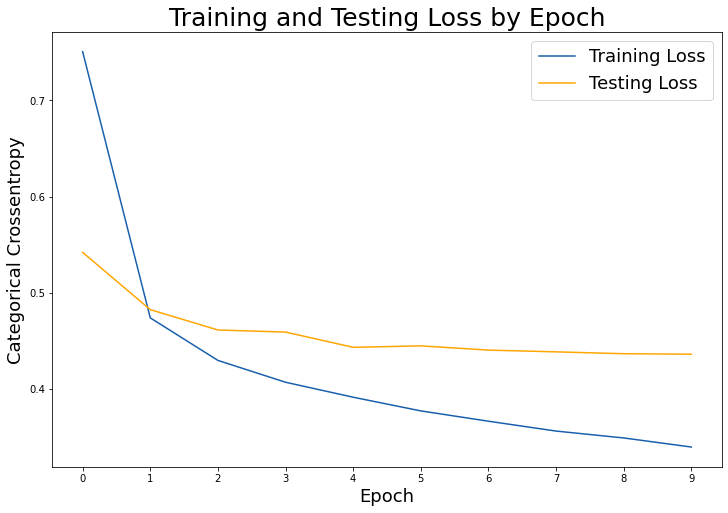

In [84]:
plot_loss(history)

# Predicting on validation data:

In [85]:
data_path = path+'/testing'
data_dir = os.listdir(data_path)

In [86]:
data_dir

['vegetarian', 'places', 'non_vegetarian']

In [87]:
img_data_list = []
labels = []

for data in data_dir:
    img_list = os.listdir(data_path+'/'+data)
    print('Loading images of', data)
    for img in img_list:
        img_path = data_path+'/'+data + '/' +img
        try:
            img = image.load_img(img_path, target_size= (224,224))
            x = image.img_to_array(img)
            x = preprocess_input(x)
            img_data_list.append(x)
            labels.append(data)
        except:
            continue

Loading images of vegetarian
Loading images of places
Loading images of non_vegetarian


In [88]:
img_data = np.array(img_data_list)

In [89]:
img_data.shape

(96, 224, 224, 3)

In [90]:
np.save('testing_data.npy', img_data)

In [91]:
np.save('testing_labels.npy', labels)

In [92]:
img_data = np.load('testing_data.npy')
labels = np.load('testing_labels.npy')

In [93]:
len(img_data)

96

In [94]:
len(labels)

96

In [95]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'pla

In [96]:
num_class = 3
num_of_samples = img_data.shape[0]

In [97]:
num_of_samples

96

In [98]:
from tensorflow.keras.utils import to_categorical

In [99]:
names = ['vegetarian', 'places', 'non_vegetarian']

In [100]:
from tensorflow.keras import utils

In [101]:
num_labels = []

In [102]:
for each in labels:
    if each == 'vegetarian':
        num_labels.append(0)
    elif each == 'non_vegetarian':
        num_labels.append(1)
    else:
        num_labels.append(2)

In [103]:
num_labels= np.array(num_labels)

In [104]:
num_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [105]:
num_labels[:2]

array([0, 0])

In [106]:
labels

array(['vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'vegetarian', 'vegetarian', 'vegetarian',
       'vegetarian', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'places', 'places', 'places', 'places',
       'places', 'places', 'pla

In [107]:
x = img_data

In [108]:
y = utils.to_categorical(num_labels, num_classes=3)

In [109]:
custom_resnet_model.evaluate(x,y, batch_size=10, verbose=1)

10/10 [==============================] - 5s 497ms/step - loss: 0.7020 - acc: 0.6250


[0.7020261883735657, 0.625]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


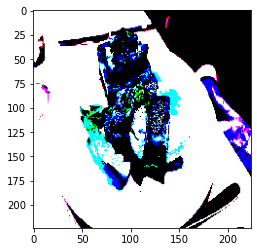

In [184]:
plt.imshow(X_test[156])